# 3. Exploratory Data Analysis - Term Deposit Subscription

## Contents
- 3.1 [Introduction](#3.1Introduction)
- 3.2 [Import, Load, Explore](#3.2-Import,Load,Explore)
- 3.3 [Analysing the target](#3.3Analysingthetarget)
- 3.4 [Univariate & Bivariate Analysis ](#3.4.Univariate&BivariateAnalysis)
   - 3.4.1 [Relationship between age and subscription](#3.4.1.Relationshipbetweenageandsubscription)
   - 3.4.2 [Relationship between balance and subscription](#3.4.2.Relationshipbetweenbalanceandsubscription)
   - 3.4.3 [Relationship between marital status and subscription](#3.4.3.Relationshipbetweenmaritalstatusandsubscription)
   - 3.4.4 [Relationship between job and subscription](#3.4.4.Relationshipbetweenjobandsubscription)
   - 3.4.5 [Relationship between education and subscription](#3.4.5.Relationshipbetweeneducationandsubscription)
   - 3.4.6 [Relationship between credit default and subscription](#3.4.6.Relationshipbetweencreditdefaultandsubscription)
   - 3.4.7 [Relationship between loans and subscription](#3.4.7.Relationshipbetweenloansandsubscription)
   - 3.4.8 [Relationship between contact type and subscription](#3.4.8.Relationshipbetweenacontacttypeandsubscription)
   - 3.4.9 [Relationship between previous outcome and subscription](#3.4.9.Relationshipbetweenpreviousoutcomeandsubscription)
   - 3.4.10 [Relationship between day and subscription](#3.4.10.Relationshipbetweendayandsubscription)
   - 3.4.11 [Relationship between month and subscription](#3.4.11.Relationshipbetweenmonthandsubscription)
   - 3.4.12 [Relationship between duration and subscription](#3.4.12.Relationshipbetweendurationandsubscription)
   - 3.4.13 [Relationship between campaign contact and subscription](#3.4.13.Relationshipbetweencampaigncontactandsubscription)
   - 3.4.14 [Relationship between days passed and subscription](#3.4.14.Relationshipbetweendayspassedandsubscription)
   - 3.4.15 [Relationship between previous contacts and subscription](#3.4.15.Relationshipbetweenpreviouscontactsandsubscription)
- 3.5 [Multivariate Analysis](#3.5.MultivariateAnalysis)
    - 3.5.1 [Correlation between variables](#3.5.1.Correlationbetweenvariables)
    - 3.5.2 [Visualizing relationships](#3.5.2.Visualizingrelationships)
- 3.6 [Summary](#3.6.Summary)


## 3.1 Introduction <a id="3.1Introduction"></a>
In this phase, I aim to explore various aspects, trends, patterns and relationships related to the term deposit subscription by performing the following:
* analyze the target variable. 
* univariate and bivariate analyses.
* multivariate analysis to understand the relationships and correlations.
* summarize trends and patterns observed throughout the analysis.
* Conduct appropriate statistical tests to test the significance of the relationships. 


## 3.2 Import, Load, Explore <a id="3.2-Import,Load,Explore"></a>


In [146]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
#Loading clean data

data = pd.read_csv("working_data/bank_data_cleaned.csv")
data

,age,job,marital,education,credit_default,balance,housing,loan,contact_type,day,month,duration,campaign_contacts,days_passed,previous_contacts,previous_outcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,-1,0,unknown,no


In [3]:
data.describe()

,age,balance,day,month,duration,campaign_contacts,days_passed,previous_contacts
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000


## 3.3 Analysing the target 
<a id="3.3Analysingthetarget"></a>

In [145]:
data['subscription'].value_counts()

no     39922
yes     5289
Name: subscription, dtype: int64

## 3.4. Univariate & Bivariate Analysis 
<a id="3.4.Univariate&BivariateAnalysis"></a>

#### 3.4.1. Relationship between age and subscription
<a id="3.4.1.Relationshipbetweenageandsubscription"></a>

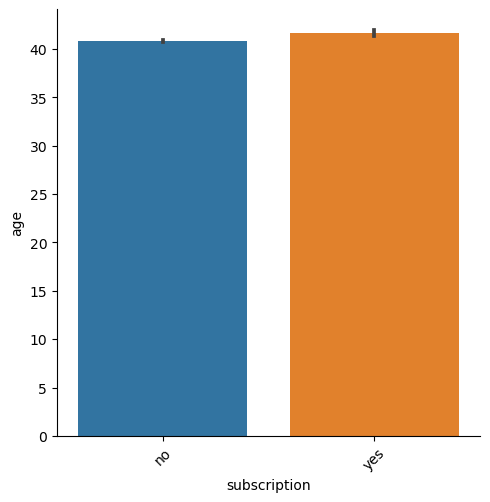

In [169]:
sns.catplot(x = 'subscription', y = 'age', data = data, kind = 'bar')
plt.xticks(rotation = 45)
plt.show()

In [9]:
#creating age groups to see this relationship 

data['age_group'] = pd.cut(
    data['age'], [0,20, 30, 40, 50, 60, 70, 80],
    labels = ['Under 20', '20-29', '30-39', '40-49',
              '50-59', '60-69', 'Over 70']
)

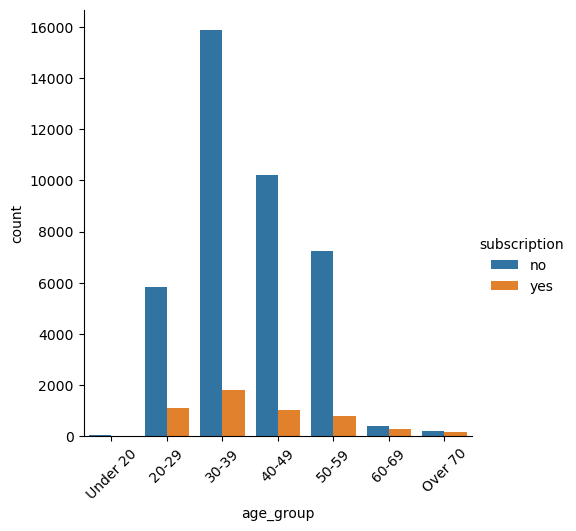

In [10]:
sns.catplot( x = 'age_group', data = data, kind = 'count', hue = 'subscription')
plt.xticks(rotation = 45)
plt.show()

In [11]:
def grouping(x):
    return data.groupby('subscription')[x].value_counts().unstack()

In [12]:
grouping('age_group')

age_group,Under 20,20-29,30-39,40-49,50-59,60-69,Over 70
subscription,,,,,,,
no,64,5821,15875,10220,7256,417,213
yes,33,1112,1812,1019,811,284,175


In [13]:
def percentage(x):
    counts = data.groupby('subscription')[x].value_counts().unstack()
    percentage = counts.div(counts.sum(axis=0), axis=1) * 100
    return percentage

In [14]:
percentage_age = percentage('age_group')
percentage_age

age_group,Under 20,20-29,30-39,40-49,50-59,60-69,Over 70
subscription,,,,,,,
no,65.979381,83.960767,89.755187,90.933357,89.946696,59.486448,54.896907
yes,34.020619,16.039233,10.244813,9.066643,10.053304,40.513552,45.103093


In [15]:
def plot_pct(variable , label):
    variable.plot(kind='bar')
    plt.xlabel('label')
    plt.ylabel('Percentage of subscribers (%)')
    plt.title(f'Percentage of subscription by {label}')
    plt.show()

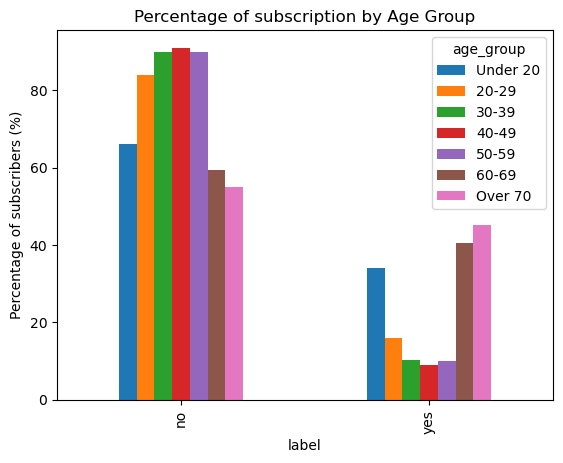

In [16]:
plot_pct(percentage_age , 'Age Group')

Initially, no direct indication that older aged customers have higher number of subscription was observed. 

Examining the plot showing subscription distribution by age group, it's evident that, the majority of the individuals targeted by the campaign fall within the age range of 30s and 40s. This suggests that these demographic segments are significant subscribers to term deposits. However, it's important to note that their apparent higher subscription rate is primarily due to their larger representation in the campaign.

Upon analyzing and visualising the subscription percentage within each age group, we observe a different perspective. Specifically, individuals in their 40s, followed by those in their 30s, actually display the lowest subscription rates relative to their respective age groups in this campaign. Conversely, nearly half of the campaign recipients aged over 70 end up subscribing, indicating a substantial conversion rate in this age category. 
Moreover, customers in their 60s and over 70 as well as those under 20 years of age exhibit notably higher subscription rates compared to others within their respective age groups.

#### 3.4.2. Relationship between balance and subscription
<a id="3.4.2.Relationshipbetweenbalanceandsubscription"></a>

In [17]:
data['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [18]:
data[data['subscription'] == 'yes']['balance'].describe()

count     5289.000000
mean      1804.267915
std       3501.104777
min      -3058.000000
25%        210.000000
50%        733.000000
75%       2159.000000
max      81204.000000
Name: balance, dtype: float64

In [19]:
data[data['subscription'] == 'no']['balance'].describe()

count     39922.000000
mean       1303.714969
std        2974.195473
min       -8019.000000
25%          58.000000
50%         417.000000
75%        1345.000000
max      102127.000000
Name: balance, dtype: float64

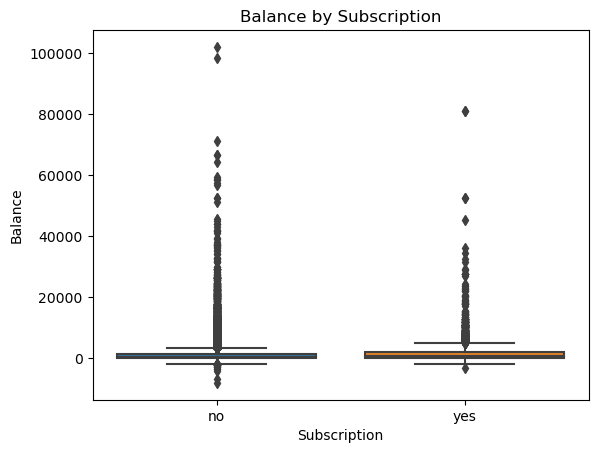

In [20]:
sns.boxplot(x='subscription', y='balance', data=data)
plt.xlabel('Subscription')
plt.ylabel('Balance')
plt.title('Balance by Subscription')
plt.show()

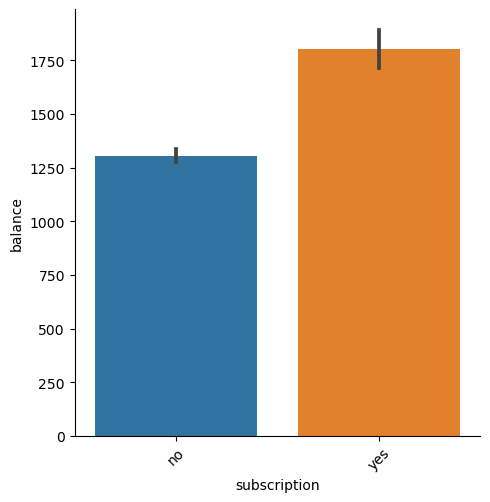

In [167]:
sns.catplot(x = 'subscription', y = 'balance', data = data, kind = 'bar')
plt.xticks(rotation = 45)
plt.show()

In [21]:
#creating age groups to see this relationship 

data['balance_group'] = pd.cut(
    data['balance'], [-50000, 0, 15000,  30000, 45000 ,
                      60000, 75000, 90000, 105000],
    labels = ['negative', 'under 15k', '16k-30k','31k-45k', 
              '46k-60k', '61k-75k', '76k-90k', '91k- 105k']
)

In [22]:
grouping('balance_group')

balance_group,negative,under 15k,16k-30k,31k-45k,46k-60k,61k-75k,76k-90k,91k- 105k
subscription,,,,,,,,
no,6778,32837,264,27,10,4,0,2
yes,502,4743,35,4,3,0,2,0


In [23]:
percentage_b = percentage('balance_group')
percentage_b

balance_group,negative,under 15k,16k-30k,31k-45k,46k-60k,61k-75k,76k-90k,91k- 105k
subscription,,,,,,,,
no,93.104396,87.378925,88.294314,87.096774,76.923077,100.0,0.0,100.0
yes,6.895604,12.621075,11.705686,12.903226,23.076923,0.0,100.0,0.0


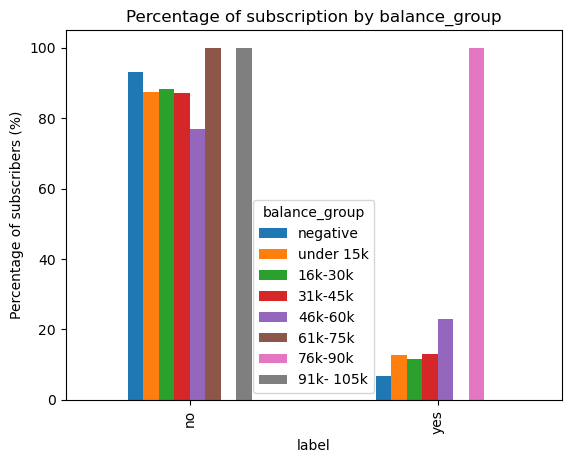

In [24]:
plot_pct(percentage_b , 'balance_group')

* The distribution of balance for records with a 'no' subscription shows more outliers but a narrower spread and lower mean.

* When comparing the proportion of balance groups for 'no' vs. 'yes' subscriptions, it appears that higher balances are be associated with 'yes' subscriptions. but because there are a few observations for customers with a balance of over 45,000, making such claims required further investigation and statistical testing. 

#### 3.4.3. Relationship between marital status and subscription
<a id="3.4.3.Relationshipbetweenmaritalstatusandsubscription"></a>

In [25]:
grouping('marital')

marital,divorced,married,single
subscription,,,
no,4585,24459,10878
yes,622,2755,1912


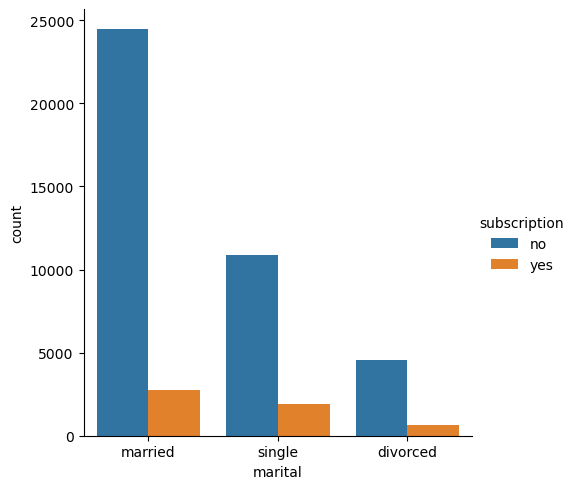

In [26]:
sns.catplot( x = 'marital', data = data, kind = 'count', hue = 'subscription')
plt.show()

In [27]:
percentage_m = percentage('marital')
percentage_m

marital,divorced,married,single
subscription,,,
no,88.054542,89.876534,85.050821
yes,11.945458,10.123466,14.949179


Taking the same approach, we can see that a significant portion of campaign recipients who subscribed were identified as married- again due to their larger representation in the campaign. And singles actually displayed a slightly higher subscription rate compared to the other groups.

#### 3.5.4. Relationship between job and subscription
<a id="3.4.4.Relationshipbetweenjobandsubscription"></a>

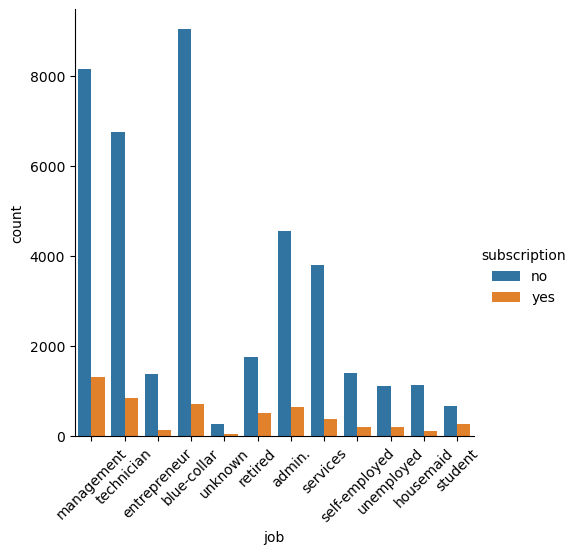

In [28]:
sns.catplot( x = 'job', data = data, kind = 'count', hue = 'subscription')
plt.xticks(rotation = 45)
plt.show()

In [29]:
percentage_j = percentage('job')
percentage_j

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
subscription,,,,,,,,,,,,
no,87.797331,92.725031,91.728312,91.209677,86.244449,77.208481,88.157061,91.116996,71.321962,88.943004,84.497314,88.194444
yes,12.202669,7.274969,8.271688,8.790323,13.755551,22.791519,11.842939,8.883004,28.678038,11.056996,15.502686,11.805556


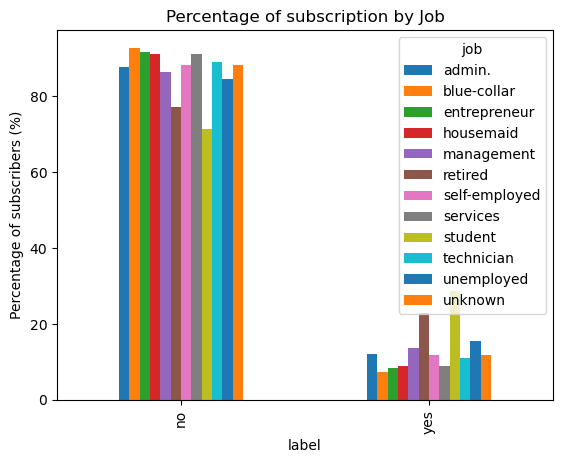

In [30]:
plot_pct(percentage_j , 'Job')

Here we can see that, a higher percentage of subscriptions ('yes') during this campaign come from individuals in job categories 'student,' 'retired,' and 'unemployed'.

#### 3.4.5. Relationship between education and subscription
<a id="3.4.5.Relationshipbetweeneducationandsubscription"></a>

In [31]:
grouping('education')

education,primary,secondary,tertiary,unknown
subscription,,,,
no,6260,20752,11305,1605
yes,591,2450,1996,252


In [32]:
percentage_ed = percentage('education')
percentage_ed

education,primary,secondary,tertiary,unknown
subscription,,,,
no,91.373522,89.440565,84.99361,86.429725
yes,8.626478,10.559435,15.00639,13.570275


#### 3.4.6. Relationship between credit default and subscription
<a id="3.4.6.Relationshipbetweencreditdefaultandsubscription"></a>

In [33]:
grouping('credit_default')

credit_default,no,yes
subscription,,
no,39159,763
yes,5237,52


In [34]:
percentage_def = percentage('credit_default')
percentage_def

credit_default,no,yes
subscription,,
no,88.203892,93.619632
yes,11.796108,6.380368


#### 3.4.7. Relationship between loans and subscription
<a id="3.4.7.Relationshipbetweenloansandsubscription"></a>

In [35]:
grouping('housing')

housing,no,yes
subscription,,
no,16727,23195
yes,3354,1935


In [36]:
percentage_hs = percentage('housing')
percentage_hs

housing,no,yes
subscription,,
no,83.297645,92.30004
yes,16.702355,7.69996


In [37]:
grouping('loan')

loan,no,yes
subscription,,
no,33162,6760
yes,4805,484


In [38]:
percentage_ln = percentage('loan')
percentage_ln

loan,no,yes
subscription,,
no,87.344273,93.318609
yes,12.655727,6.681391


#### 3.4.8. Relationship between contact type and subscription
<a id="3.4.8.Relationshipbetweenacontacttypeandsubscription"></a>

In [39]:
grouping('contact_type')

contact_type,cellular,telephone,unknown
subscription,,,
no,24916,2516,12490
yes,4369,390,530


In [40]:
percentage_ct = percentage('contact_type')
percentage_ct

contact_type,cellular,telephone,unknown
subscription,,,
no,85.0811,86.579491,95.929339
yes,14.9189,13.420509,4.070661


From the above we can observe that:
* The percentage of each category for `education` grouped by subscription doesn't vary greatly. however, we can observe that a greater proportion of those with 'tertiary education' have subscribed as compared to the other categories
* A somewhat larger portion of those who don't have `credit as default` have subscribed. 
* A larger portion of the bank's customers who don't have any `housing` or other type of `loans` have subscribed as opposed to those with loans.
* The variable `contact type` doesn't exhibit a notable difference in subscription rates among its categories.  And nearly a third of its values are 'unknown'. Hence, discernible patterns have not emerged yet.

#### 3.4.9. Relationship between previous outcome and subscription
<a id="3.4.9.Relationshipbetweenpreviousoutcomeandsubscription"></a>

In [80]:
data['previous_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: previous_outcome, dtype: int64

In [87]:
grouping('previous_outcome').join(grouping('previous_outcome').sum(axis = 1).rename('total_sub'))

,failure,other,success,unknown,total_sub
subscription,,,,,
no,4283,1533,533,33573,39922
yes,618,307,978,3386,5289


In [42]:
percentage_pr = percentage('previous_outcome')
percentage_pr

previous_outcome,failure,other,success,unknown
subscription,,,,
no,87.390329,83.315217,35.274653,90.838497
yes,12.609671,16.684783,64.725347,9.161503


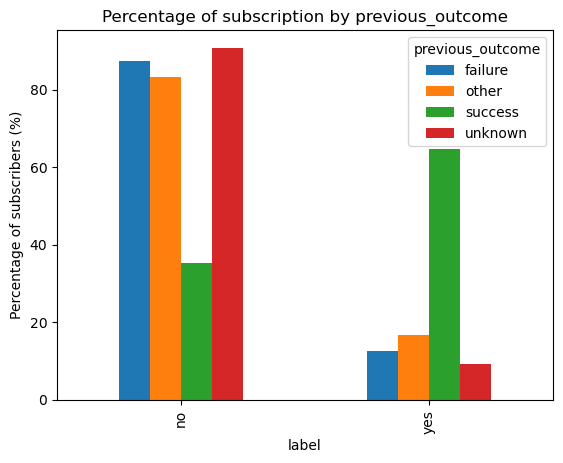

In [43]:
plot_pct(percentage_pr, 'previous_outcome')

* We can see that `previous outcome` is highly imbalances with over 80% of it falling in the category of 'unkown'. However observing at the remaining data, in terms of proportion from the total, a significant proportion of individuals who had subscribed on the previous campaign have subscribed in this campaign. This indicates that past outcomes may serve as valuable indicators for the success of the current campaign but further investigation is required to make this claim.

#### 3.4.10. Relationship between day and subscription
<a id="3.4.10.Relationshipbetweendayandsubscription"></a>

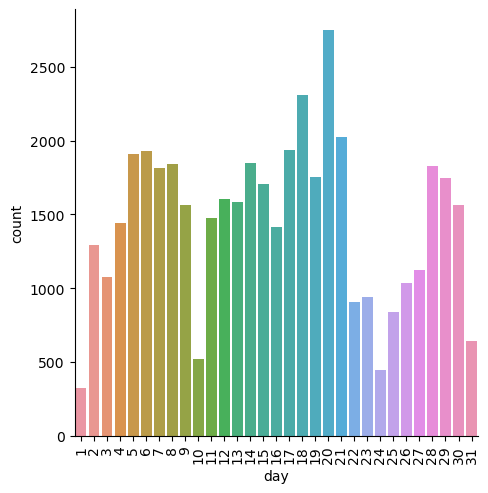

In [44]:
sns.catplot(x='day', data=data, kind = 'count')
plt.xticks(rotation = 90)
plt.show()

In [45]:
data.groupby('subscription')['day'].describe()

,count,mean,std,min,25%,50%,75%,max
subscription,,,,,,,,
no,39922.0,15.892290,8.294728,1.0,8.0,16.0,21.0,31.0
yes,5289.0,15.158253,8.501875,1.0,8.0,15.0,22.0,31.0


In [46]:
def plot_var(y):
    sns.boxplot(x='subscription', y= y, data= data)
    plt.show()

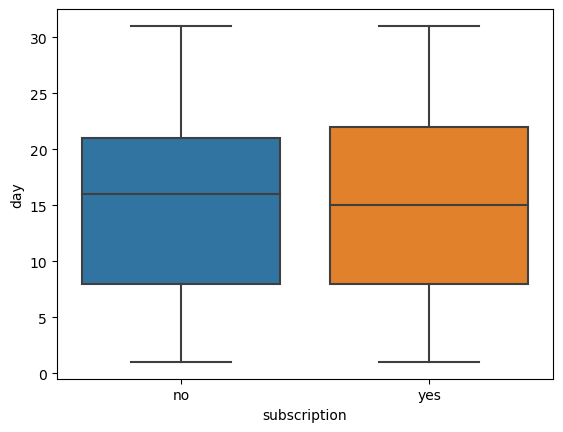

In [47]:
plot_var('day')

In [48]:
grouping('day').T

subscription,no,yes
day,,
1,232,90
2,1111,182
3,901,178
4,1215,230
5,1695,215
6,1751,181
7,1660,157
8,1641,201
9,1382,179


In [49]:
percentage('day').T

subscription,no,yes
day,,
1,72.049689,27.950311
2,85.924207,14.075793
3,83.503244,16.496756
4,84.083045,15.916955
5,88.743455,11.256545
6,90.631470,9.368530
7,91.359384,8.640616
8,89.087948,10.912052
9,88.532992,11.467008


#### 3.4.11. Relationship between month and subscription
<a id="3.4.11.Relationshipbetweenmonthandsubscription"></a>

In [50]:
data.groupby('subscription')['month'].describe()

,count,mean,std,min,25%,50%,75%,max
subscription,,,,,,,,
no,39922.0,6.128250,2.356746,1.0,5.0,6.0,7.0,12.0
yes,5289.0,6.268482,2.761743,1.0,4.0,6.0,8.0,12.0


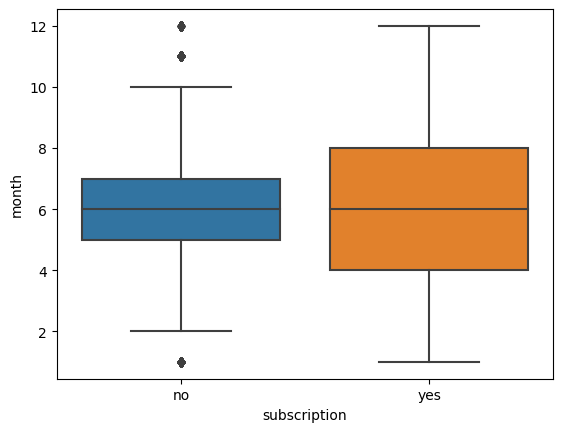

In [51]:
plot_var('month')

In [52]:
grouping('month')

month,1,2,3,4,5,6,7,8,9,10,11,12
subscription,,,,,,,,,,,,
no,1261,2208,229,2355,12841,4795,6268,5559,310,415,3567,114
yes,142,441,248,577,925,546,627,688,269,323,403,100


In [53]:
percentage_month = percentage('month')
percentage_month

month,1,2,3,4,5,6,7,8,9,10,11,12
subscription,,,,,,,,,,,,
no,89.878831,83.352208,48.008386,80.3206,93.280546,89.777195,90.906454,88.986714,53.540587,56.233062,89.848866,53.271028
yes,10.121169,16.647792,51.991614,19.6794,6.719454,10.222805,9.093546,11.013286,46.459413,43.766938,10.151134,46.728972


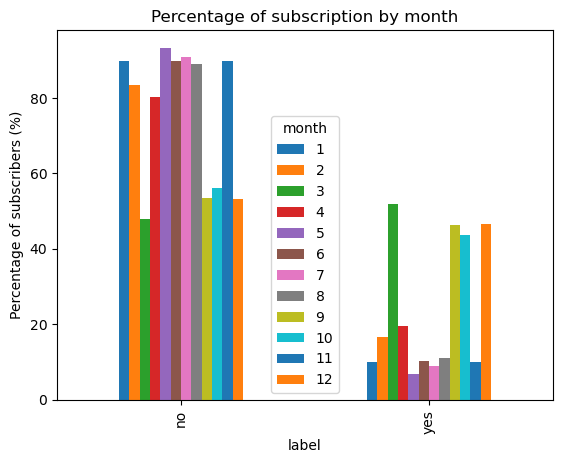

In [54]:
plot_pct(percentage_month, 'month')

While `day` doesn't show a significant variablity with regards to subscription, The variable `month` shows that, campaign calls whose last contact month was 'March' did exceptionally well than other months. Conversely, records having last contact month of May were the least successful in terms of subscription.

#### 3.4.12. Relationship between duration and subscription
<a id="3.4.12.Relationshipbetweendurationandsubscription"></a>

In [55]:
data.groupby('subscription')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
subscription,,,,,,,,
no,39922.0,221.182806,207.383237,0.0,95.0,164.0,279.0,4918.0
yes,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0


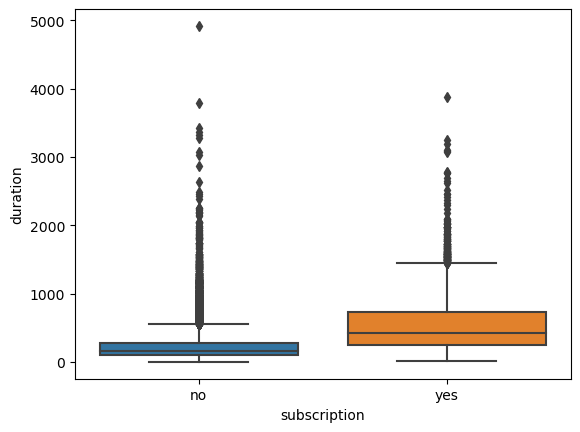

In [56]:
plot_var('duration')

#### 3.4.13. Relationship between campaign_contacts and subscription
<a id="3.4.13.Relationshipbetweencampaigncontactandsubscription"></a>

In [57]:
data.groupby('subscription')['campaign_contacts'].describe()

,count,mean,std,min,25%,50%,75%,max
subscription,,,,,,,,
no,39922.0,2.846350,3.212767,1.0,1.0,2.0,3.0,63.0
yes,5289.0,2.141047,1.921826,1.0,1.0,2.0,3.0,32.0


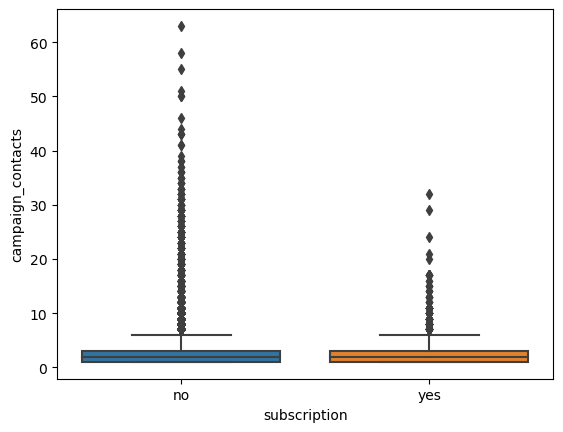

In [58]:
plot_var('campaign_contacts')

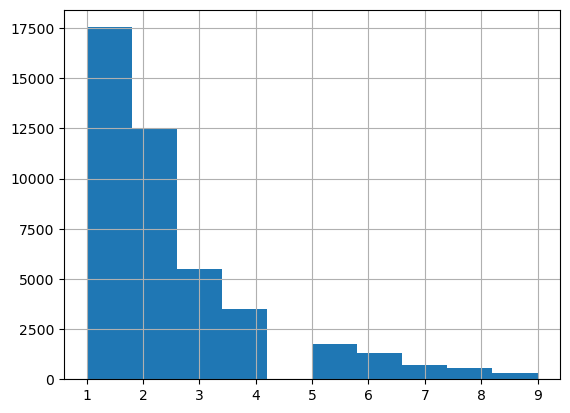

In [142]:
data[data['campaign_contacts']<10]['campaign_contacts'].hist()
plt.show()

In [139]:
yes = data[data['subscription'] == 'yes']['campaign_contacts']
no = data[data['subscription'] == 'no']['campaign_contacts']
contacts_yes = yes[yes < 10]
contacts_no = no[no < 10]

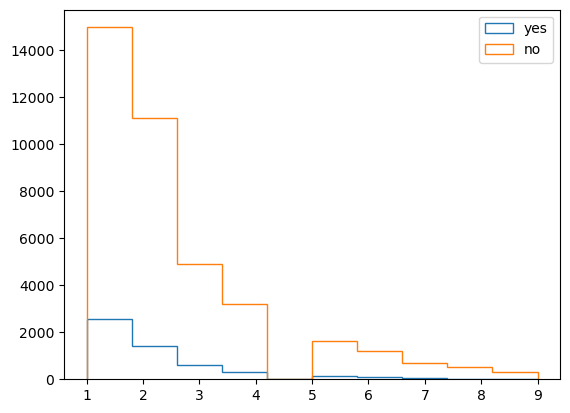

In [140]:
fig, ax = plt.subplots()

ax.hist(contacts_yes, label = 'yes', histtype = 'step')
ax.hist(contacts_no, label = 'no', histtype = 'step')
ax.legend()
plt.show()

#### 3.4.14. Relationship between days passed and subscription 
<a id="3.4.14.Relationshipbetweendayspassedandsubscription"></a>

In [59]:
data.groupby('subscription')['days_passed'].describe()

,count,mean,std,min,25%,50%,75%,max
subscription,,,,,,,,
no,39922.0,36.421372,96.757135,-1.0,-1.0,-1.0,-1.0,871.0
yes,5289.0,68.702968,118.822266,-1.0,-1.0,-1.0,98.0,854.0


In [79]:
percentage('days_passed').T.join(data['days_passed'].value_counts())

,no,yes,days_passed
days_passed,,,
-1,90.842669,9.157331,36954
1,60.000000,40.000000,15
2,94.594595,5.405405,37
3,100.000000,NaN,1
4,50.000000,50.000000,2
...,...,...,...
838,100.000000,NaN,1
842,NaN,100.000000,1
850,100.000000,NaN,1


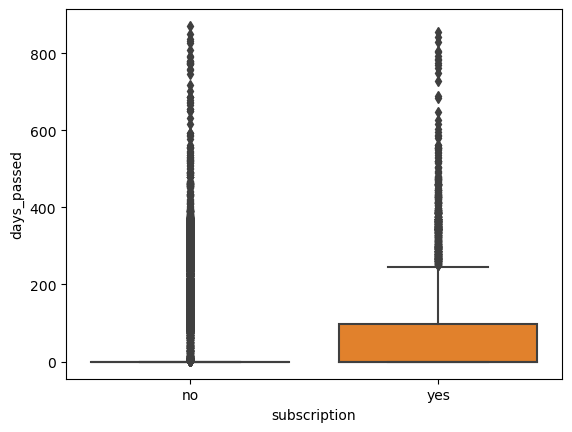

In [60]:
plot_var('days_passed')

#### 3.4.15. Relationship between  previous contacts and subscription 
<a id="3.4.15.Relationshipbetweenpreviouscontactsandsubscription"></a>

In [61]:
data.groupby('subscription')['previous_contacts'].describe()

,count,mean,std,min,25%,50%,75%,max
subscription,,,,,,,,
no,39922.0,0.502154,2.256771,0.0,0.0,0.0,0.0,275.0
yes,5289.0,1.170354,2.553272,0.0,0.0,0.0,1.0,58.0


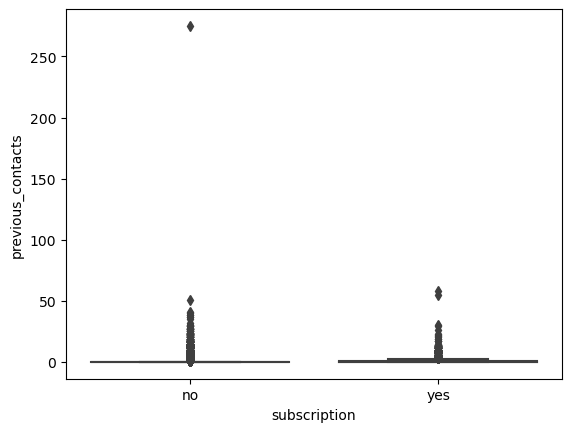

In [62]:
plot_var('previous_contacts')

In [76]:
percentage('previous_contacts').T.join(data['previous_contacts'].value_counts())

,no,yes,previous_contacts
previous_contacts,,,
0,90.842669,9.157331,36954
1,78.968254,21.031746,2772
2,78.347578,21.652422,2106
3,74.255692,25.744308,1142
4,76.050420,23.949580,714
5,73.638344,26.361656,459
6,70.036101,29.963899,277
7,73.658537,26.341463,205
8,69.767442,30.232558,129


The `duration` variable shows a higher mean and a narrower spread for records with 'yes' `subscription`, hinting that a moderate conversation length during campaign calls could associate with a higher subscription rate. On the other hand, 'no' subscriptions have more outliers on the higher end.

Regarding `campaign contacts`, most values cluster on the low end. 'no' subscriptions have more upper-end outliers, but no distinct pattern differentiates them from 'yes' subscriptions.

For `previous contacts`, there's minimal variability. A substantial 81.7% of the data has a value of 0, indicating no previous contacts. And thus, it lacks a clear pattern concerning subscriptions.

Both `days_passed'`and `previous_contacts` are correlated, sharing a highly imbalanced value distribution.

## 3.5. Multivariate Analysis
<a id="3.5.MultivariateAnalysis"></a> 

### 3.5.1. Correlation between variables
 <a id="3.5.1.Correlationbetweenvariables"></a>

In [4]:
data_num = data.select_dtypes(exclude='object')

In [5]:
cor = data_num.corr()
cor

,age,balance,day,month,duration,campaign_contacts,days_passed,previous_contacts
age,1.000000,0.097783,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710
month,0.092903,0.094605,0.101989,1.000000,-0.011866,0.054868,-0.108940,-0.035600
duration,-0.004648,0.021560,-0.030206,-0.011866,1.000000,-0.084570,-0.001565,0.001203
campaign_contacts,0.004760,-0.014578,0.162490,0.054868,-0.084570,1.000000,-0.088628,-0.032855
days_passed,-0.023758,0.003435,-0.093044,-0.108940,-0.001565,-0.088628,1.000000,0.454820
previous_contacts,0.001288,0.016674,-0.051710,-0.035600,0.001203,-0.032855,0.454820,1.000000


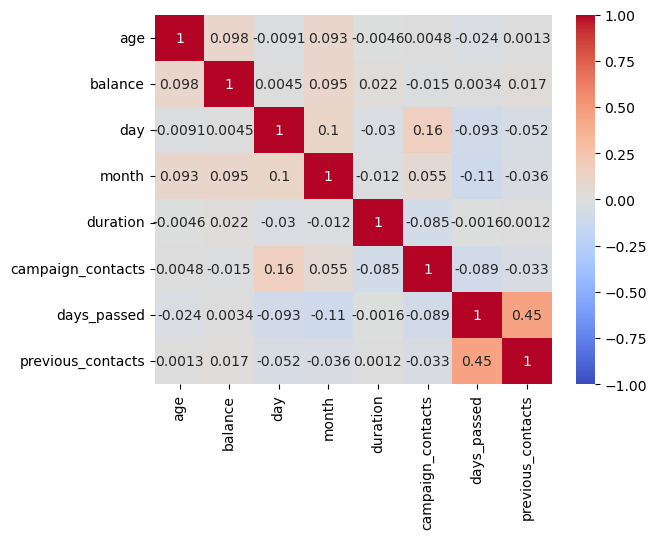

In [6]:
sns.heatmap(cor, annot = True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.show()

The higest correlation of 0.45 is b/n `days_passed` and `previous contacts`:
* In the data wrangling phase looking at the distribution of the variables we concluded that, 81.7% of the clients were never previously contacted for a previous campaign. And the number of clients not previously contacted from `days_passed` checks out with the number of contacts made to those clients being 0 in `previous_contacts`. Thus the number is 0 for 87.7% of the clients in `previous_contacts`. And this explains the high correlation seen between the two variables. (We may need to drop one of them to avoid multicollinearity problem).

The rest are all very week to no correlations of beteen -1.1 and 1.6.
* the fact that `day` and `campaign contacts` are some what correlated might make sense since the higher number of contacts the more likely of the last contact to be in the later days of the month if the the campaign ended by the end of that month. but not a significat info.
*  -1.1 correlation of `month` and `days passed` shows there cis a very weak negative correlation and it makes sense because more days will pass for the contacts made in the begining of the year than later.


In [64]:
data.describe()

,age,balance,day,month,duration,campaign_contacts,days_passed,previous_contacts
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000


### 3.5.2 Visualizing Potential Relationships
<a id="3.5.2.Visualizingrelationships"></a>

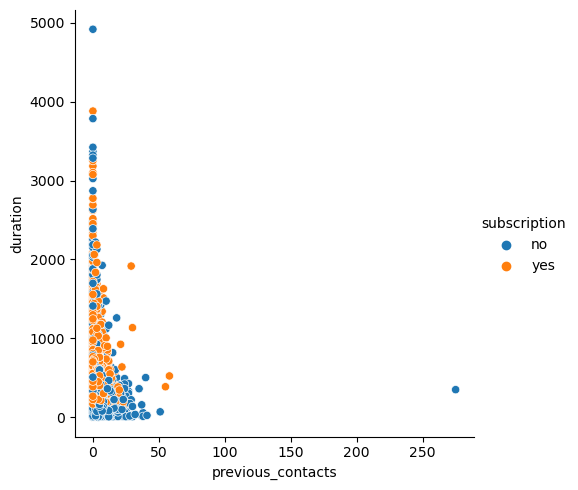

In [65]:
sns.relplot(x = 'previous_contacts', y = 'duration', hue = 'subscription', data = data, kind = 'scatter')
plt.show()

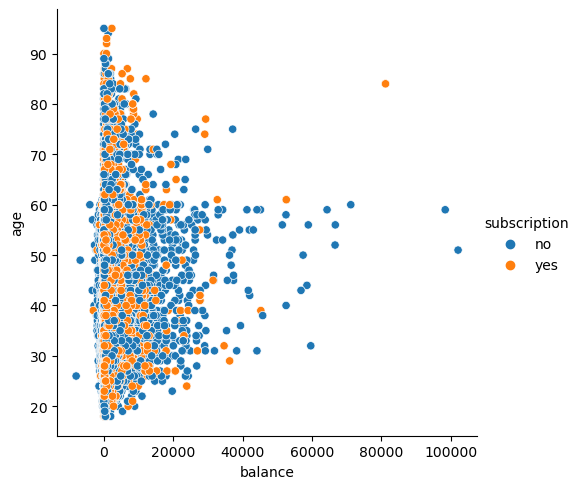

In [66]:
sns.relplot(x = 'balance', y = 'age', hue = 'subscription', data = data, kind = 'scatter')
plt.show()

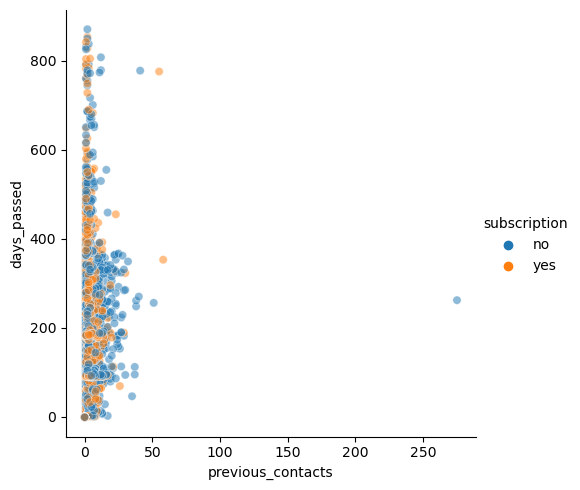

In [159]:
sns.relplot(x = 'previous_contacts', y = 'days_passed', data = data, kind = 'scatter', hue = 'subscription', alpha = 0.5)
plt.show()

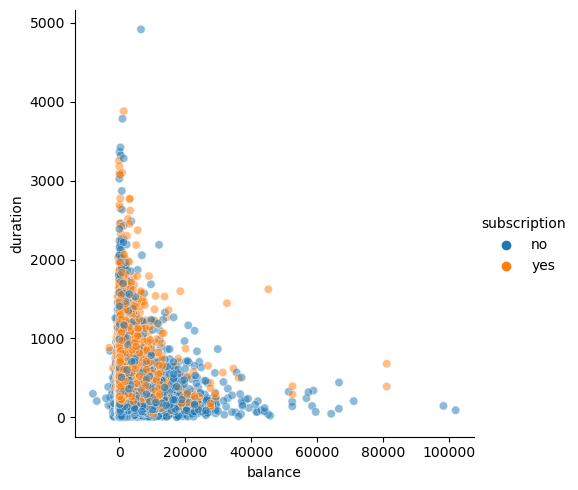

In [160]:
sns.relplot(x = 'balance', y = 'duration', data = data, kind = 'scatter', hue = 'subscription', alpha = 0.5)
plt.show()

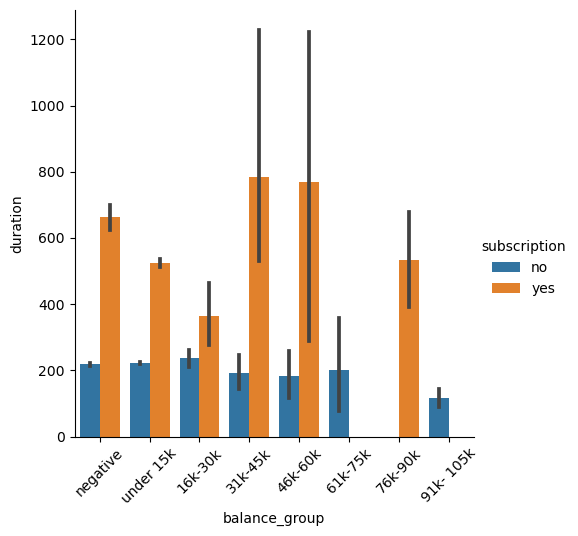

In [158]:
sns.catplot(x = 'balance_group', y = 'duration', data = data, kind = 'bar', hue = 'subscription')
plt.xticks(rotation = 45)
plt.show()

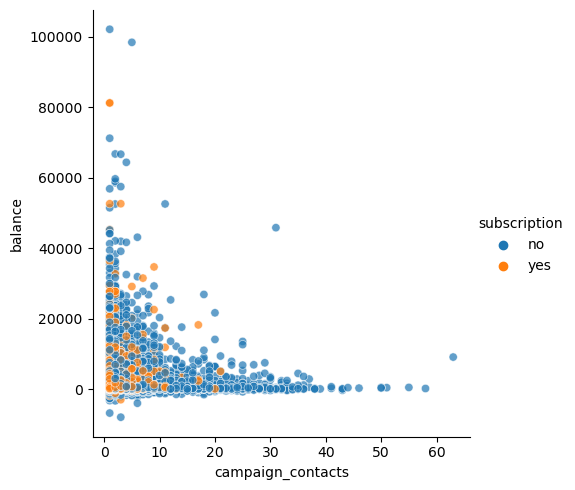

In [161]:
sns.relplot(x = 'campaign_contacts', y = 'balance', data = data, kind = 'scatter', hue = 'subscription', alpha = 0.7)
plt.show()

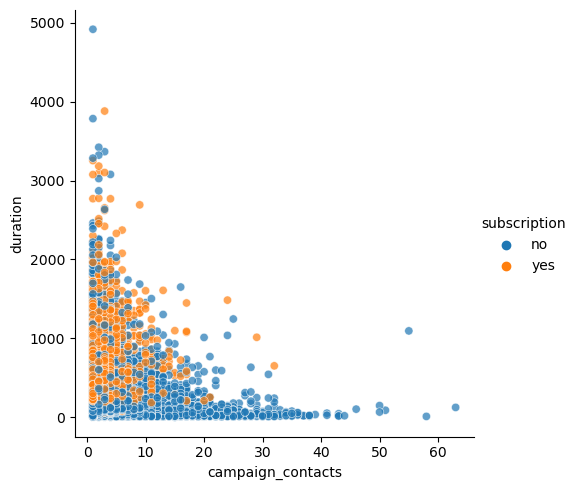

In [152]:
sns.relplot(x = 'campaign_contacts', y = 'duration', data = data, kind = 'scatter', hue = 'subscription', alpha = 0.7)
plt.show()

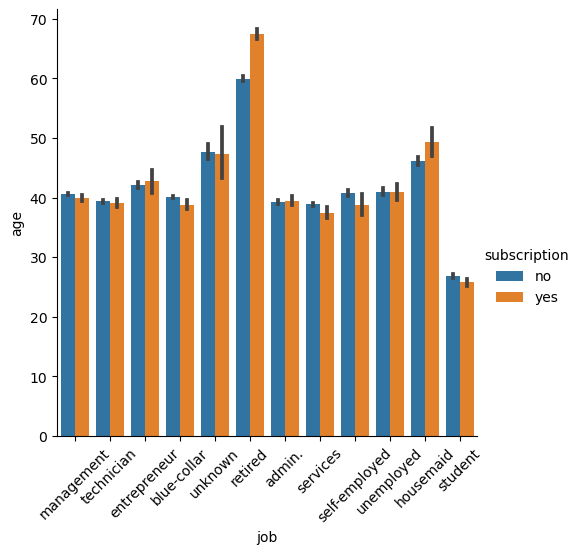

In [151]:
sns.catplot(x = 'job', y = 'age', data = data, kind = 'bar', hue = 'subscription')
plt.xticks(rotation = 45)
plt.show()

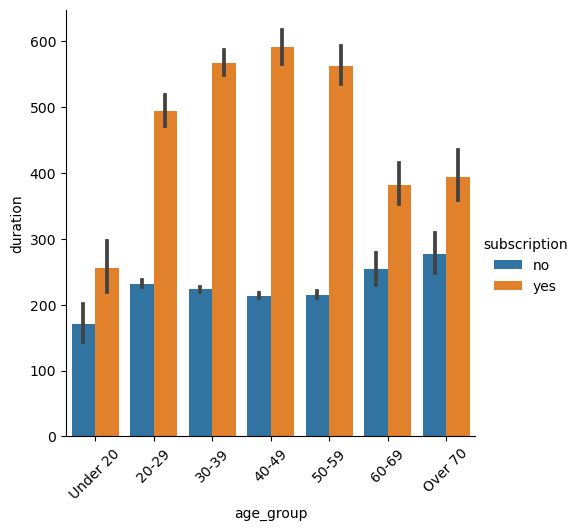

In [156]:
sns.catplot(x = 'age_group', y = 'duration', data = data, kind = 'bar', hue = 'subscription')
plt.xticks(rotation = 45)
plt.show()

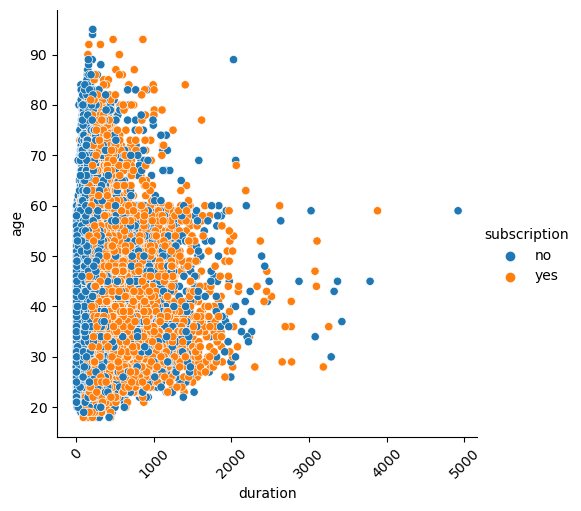

In [157]:
sns.relplot(x = 'duration', y = 'age', data = data, kind = 'scatter', hue = 'subscription')
plt.xticks(rotation = 45)
plt.show()

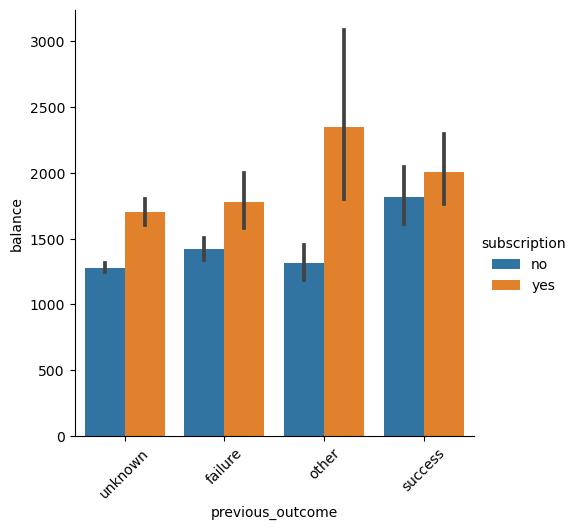

In [163]:
sns.catplot(x = 'previous_outcome', y = 'balance', data = data, kind = 'bar', hue = 'subscription')
plt.xticks(rotation = 45)
plt.show()

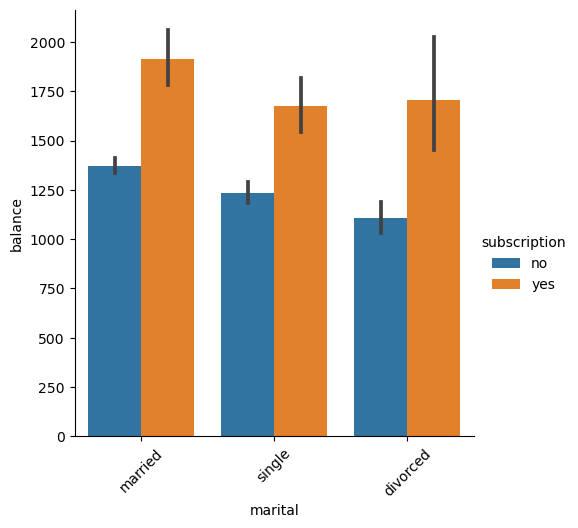

In [165]:
sns.catplot(x = 'marital', y = 'balance', data = data, kind = 'bar', hue = 'subscription')
plt.xticks(rotation = 45)
plt.show()

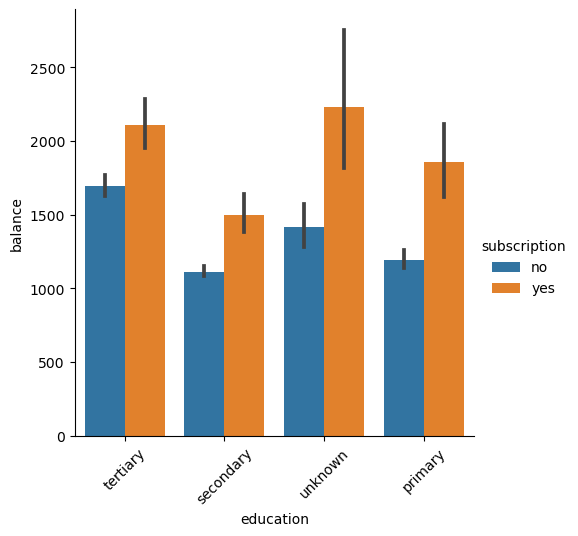

In [166]:
sns.catplot(x = 'education', y = 'balance', data = data, kind = 'bar', hue = 'subscription')
plt.xticks(rotation = 45)
plt.show()

## 3.6. Summary
<a id="3.6.Summary"></a>



**Conclusions:**

* Individuals categorized as single exhibit a slightly higher subscription rate compared to their married and divorced counterparts.

* Higher levels of education tend to be associated with an increased number of subscription to the term deposit.
* Higher balances are be associated with 'yes' subscriptions.

* Customers without existing loans show a higher rate of subscription, aligning with intuitive expectations.

* My analysis did not reveal a significant influence of contact type or specific days of the month on the subscription rate. However, variations across months could be attributed to the timing of the campaign.

* Shorter call durations and a moderate number of contacts appear to be linked with a higher number of subscription rate.

* Customers above the age of 60 and those below 20, as well as retirees and students, are likely to be associated with a higher number of subscription. This connection between age and job aligns with the expected demographics, where older individuals are likely to be retired and younger ones are likely to be students.

* The minimal variability observed in 'previous_outcome' raises concerns and challenges the apparent correlation between past success and higher subscription rates. Further in-depth investigation is essential to validate this pattern.

* Finaly, further investigation, statistical validations & advanced nalytical approaches are necessary for establishing the reliablilty of these patterns and insights.

## Test some hypothesis...?

Are customers with a higher balance really more likely to subscribe to term deposits?


In [70]:
data

,age,job,marital,education,credit_default,balance,housing,loan,contact_type,day,month,duration,campaign_contacts,days_passed,previous_contacts,previous_outcome,subscription,age_group,balance_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,50-59,under 15k
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,40-49,under 15k
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,30-39,under 15k
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,40-49,under 15k
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,30-39,under 15k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,-1,0,unknown,yes,50-59,under 15k
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,-1,0,unknown,yes,Over 70,under 15k
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,184,3,success,yes,Over 70,under 15k
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,-1,0,unknown,no,50-59,under 15k
